# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- sklearn 1.6.1
- mlxtend 0.23.4

In [1]:
import pandas as pd
import numpy as np
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")

print("Path to dataset files:", path)

foo = path + '/online_retail_II.csv'

df = pd.read_csv(foo, encoding="latin1")

# Cada fila es un ítem en una transacción (Invoice). Para agrupar por transacción:
data = df.groupby("Invoice")["StockCode"].apply(list).tolist()
data = data[:50000]

Path to dataset files: /home/marcelo/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3



## Actividad en clase

Usando el algoritmo **apriori**, haga lo siguiente:

- Codifique las transacciones usando one hot encodings.
- Use una estrategia de exploración para MinSupp. Monitoree el uso de memoria. ¿En cuál rango de valores comienza a encontrar resultados interesantes?
- Dibuje una curva MinSupp contra Número de itemsets frecuentes encontrados en el rango de interés que exploró.
- Seleccione un valor de MinSupp. Luego busque reglas interesantes ajustando el umbral de confianza. Ajústelo de manera que encuentre al menos 7 reglas.
- Cuanto termine, me avisa para entregarle una **L (logrado)**.
- Recuerde que cada L es una décima más en la nota de la asignatura.
- Pueden trabajar de a dos.

***Tiene hasta el final de la clase.***


# Solución

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules

from mlxtend.preprocessing import TransactionEncoder

a = TransactionEncoder()
a_data = a.fit(data).transform(data)
df = pd.DataFrame(a_data,columns=a.columns_)
df = df.replace(False,0)
df = df.replace(True,1)
df

/tmp/ipykernel_115452/4203020594.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(True,1)


,10002,10002R,10080,10109,10120,10123C,10123G,10124A,10124C,10124G,...,gift_0001_10,gift_0001_20,gift_0001_30,gift_0001_40,gift_0001_50,gift_0001_60,gift_0001_70,gift_0001_80,gift_0001_90,m
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
itemsets = apriori(df, min_support = 0.02, use_colnames = True, verbose = 1)

len(itemsets)

/home/marcelo/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 705 combinations | Sampling itemset size 3 2


188

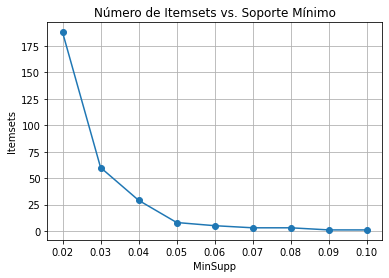

In [4]:
import matplotlib.pyplot as plt

x = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
y = [188, 60, 29, 8, 5, 3, 3, 1, 1]

plt.figure()
plt.plot(x, y, marker='o')
plt.xlabel('MinSupp')
plt.ylabel('Itemsets')
plt.title('Número de Itemsets vs. Soporte Mínimo')
plt.grid(True)
plt.show()


In [5]:
itemsets = apriori(df, min_support = 0.02, use_colnames = True, verbose = 1)

/home/marcelo/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Processing 705 combinations | Sampling itemset size 3 2


In [6]:
df_ar = association_rules(itemsets, metric = "confidence", min_threshold = 0.6)
df_ar[['antecedents','consequents','support','confidence']]

,antecedents,consequents,support,confidence
0,(22356),(20724),0.02162,0.676048
1,(21231),(21232),0.02264,0.740353
2,(21733),(85123A),0.02486,0.697140
3,(22386),(85099B),0.02860,0.633304
4,(22699),(22697),0.02080,0.724739
5,(22697),(22699),0.02080,0.756364
6,(85099F),(85099B),0.02378,0.643050
